In [17]:
#https://finance.yahoo.com/quote/AMZN/history/

In [114]:
from keras.layers import Dropout
from keras.layers import Flatten

In [97]:
def parser(x):
    return datetime.datetime.strptime(x,'%Y-%m-%d')

In [194]:
amzn_dataset=pd.read_csv("AMZN.csv",header=0,parse_dates=[0],date_parser=parser)
amzn_dataset=amzn_dataset.set_index('Date')
amzn_dataset=amzn_dataset[:-8]

In [196]:
# create a new dataframe with only Close Column
data = amzn_dataset.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)

In [197]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

<b>Split data into Train and Test </b>

In [198]:
# Create the training dataset
# Create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
# split the data
x_train = []
y_train = []

for i in range(90,len(train_data)):
  x_train.append(train_data[i-90:i,0])
  y_train.append(train_data[i,0])
  #if i<=91:
    #print(x_train)
    #print(y_train)
    #print()

In [199]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2216, 90, 1)

<b> Build the LSTM model </b>

In [201]:
# 
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (features_set_1.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2216/2216 [==============================] - 54s 24ms/step - loss: 0.0022


In [206]:
# Create the testing datset
# Create new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len-90: , :]
# Create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(90, len(test_data)):
  x_test.append(test_data[i-90:i, 0])

In [208]:
len(x_test)

576

In [209]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 90: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(90, len(test_data)):
    x_test.append(test_data[i-90:i, 0])
    

x_test = np.array(x_test)


x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))


<b> Evaluate LSTM model </b>

In [213]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))


# Get the mean absolute error (MAPE)
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

MAPE_error = MAPE(y_test, predictions)
print('Testing Mean Absolute Error is {}'.format(MAPE_error))

Testing Mean Absolute Error is 6.208026982437653


<b> Plot Predictions </b>

/Users/aydafarhadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


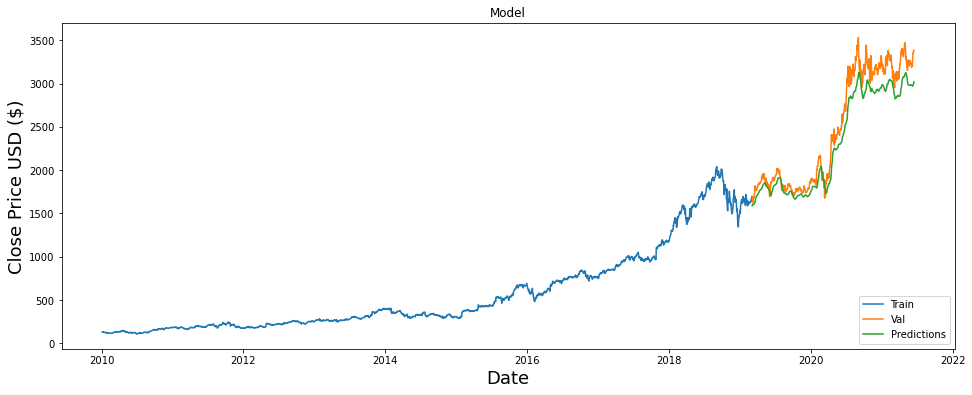

In [211]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [212]:
valid

,Close,Predictions
Date,,
2019-03-05,1692.430054,1589.847290
2019-03-06,1668.949951,1598.202515
2019-03-07,1625.949951,1604.160522
2019-03-08,1620.800049,1604.644653
2019-03-11,1670.619995,1601.662476
...,...,...
2021-06-09,3281.149902,2970.996826
2021-06-10,3349.649902,2976.090820
2021-06-11,3346.830078,2987.912598
